In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
import multiprocessing as mp
from multiprocessing.sharedctypes import RawArray
from math import sin, pi
from ctypes import c_int16

In [34]:
arr = RawArray(c_int16, 10)
for i in range(10):
    arr[i] = i
    print(arr[i])

def funk(arr):
    print(len(arr))

funk(arr)

0
1
2
3
4
5
6
7
8
9
10


In [3]:
files = [f for f in listdir('./') if f[-4:] == 'h5py']
print(files)

['stable_A.h5py', 'stable_AB.h5py', 'stable_B.h5py', 'stable_BA.h5py', 'test.h5py']


In [4]:
f = h5py.File('test.h5py', 'w')

dat = f.create_dataset('dat', shape=(10,), dtype='int16')
udat = f.create_dataset('udat', shape=(10,), dtype='uint16')

for i in range(10):
    udat[i] = i-5
    dat[i] = i-5

f.close()
f = h5py.File('test.h5py', 'r')
                        
for key in f.keys():
    print(key)
    print(f[key][()])
f.close()

dat
[-5 -4 -3 -2 -1  0  1  2  3  4]
udat
[0 0 0 0 0 0 1 2 3 4]


In [26]:
MAX = (2**16 - 1)

class Seg(mp.Process):
    
    def __init__(self, array):
        super().__init__(args=(array))
        
    def run(self):
        N = len(array)
        for i in range(N):
            array[i] = c_int16(MAX*sin(2*pi*i/N))
        print(array)

In [28]:
def targ(self, array):
        N = len(array)
        for i in range(N):
            array[i] = c_int16(MAX*sin(2*pi*i/N))
        print(array)

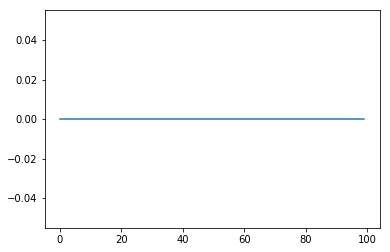

In [29]:
procs = []
data = []
for i in range(mp.cpu_count()):
    dat = RawArray(c_int16, 100)
    data.append(dat)
    
    p = mp.Process(target=targ, args=dat)
    procs.append(p)
    p.start()

for p in procs:
    p.join()
d = data.pop()    
print(d)
plt.plot(d)
plt.show()

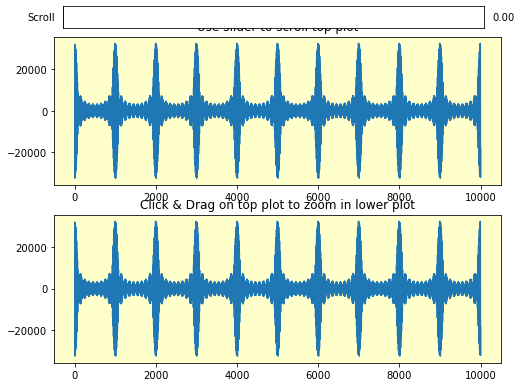

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector, Slider

PLOT_MAX = int(1E4)

filename = 'stable_AB.h5py'
sample_length = 0
with h5py.File(filename, "r") as f:
    sample_length = f.get('data').shape[0]


def load(buf, buf_start, buf_size):
    with h5py.File(filename, "r") as f:
        for i, dat in enumerate(f.get('data')[buf_start:buf_start+buf_size]):
            buf[i] = dat


N = PLOT_MAX
xdat = np.arange(N)
ydat = np.zeros(N, dtype='int16')
load(ydat, 0, N)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.set(facecolor='#FFFFCC')
line1, = ax1.plot(xdat, ydat, '-')
ax1.set_title('Use slider to scroll top plot')

ax2.set(facecolor='#FFFFCC')
line2, = ax2.plot(xdat, ydat, '-')
ax2.set_title('Click & Drag on top plot to zoom in lower plot')

def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(xdat, (xmin, xmax))
    indmax = min(N - 1, indmax)

    thisx = ydat[indmin:indmax]
    thisy = xdat[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    fig.canvas.draw()

def scroll(offset):
    thisx = np.add(xdat, offset)
    load(ydat, offset, N + offset)
    line1.set_data(thisx, ydat)
    ax1.set_xlim(thisx[0], thisx[-1])
    fig.canvas.draw()

## Widget Construction ##
axspar = plt.axes([0.14, 0.9, 0.73, 0.05])
slid = Slider(axspar, 'Scroll', valmin=0, valmax=sample_length - N, valinit=0)
span = SpanSelector(ax1, onselect, 'horizontal', useblit=True, rectprops=dict(alpha=0.5, facecolor='red'))

slid.on_changed(scroll)

plt.show()

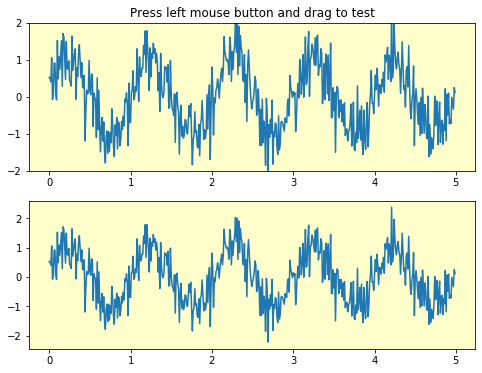

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
ax1.set(facecolor='#FFFFCC')

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2*np.pi*x) + 0.5*np.random.randn(len(x))

ax1.plot(x, y, '-')
ax1.set_ylim(-2, 2)
ax1.set_title('Press left mouse button and drag to test')

ax2.set(facecolor='#FFFFCC')
line2, = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()
    
span = SpanSelector(ax1, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red'))
# Set useblit=True on most backends for enhanced performance.


plt.show()